In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 1000
inp = np.random.uniform(-3.14,3.14,N)
out = np.sin(inp)
#print(inp,out)
    
x = Variable(torch.Tensor(inp), requires_grad=False).view(-1,1)
y = Variable(torch.Tensor(out), requires_grad =False)

H = 64

In [3]:
model = nn.Sequential(
        nn.Linear(1,H),
        nn.ReLU(),
        nn.Linear(H,1))
    
loss_fn = nn.MSELoss()

In [7]:
lr =1e-3
optimizer =torch.optim.Adam(model.parameters(), lr =lr)
  
losses = []
for i in range(5000):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    losses.append(loss.data[0])

    #print(" i, loss",i, loss)

    model.zero_grad()
    loss.backward()
    optimizer.step()
 
    #for param in model.parameters():
    #   param.data -= lr*param.grad.data
print("loss",loss.data)       

loss 
1.00000e-06 *
  1.2537
[torch.FloatTensor of size 1]



In [5]:
xn = Variable(torch.Tensor(np.arange(-3.14,3.14,0.001))).view(-1,1)
yn = model(xn)


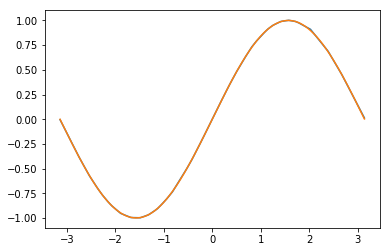

In [6]:
plt.plot(xn.data.numpy(),yn.data.numpy())
plt.plot(xn.data.numpy(),np.sin(xn.data.numpy()))

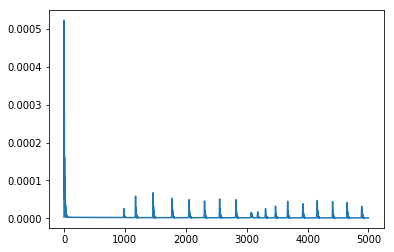

In [8]:
plt.plot(losses)